## Chord Diagram

In [1]:
try:
    import ai4water
except ModuleNotFoundError:
    !pip install git+https://github.com/AtrCheema/AI4Water.git@7d702646399956496bb1f3770cb841c073cf56db

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
try:
    from mne_connectivity.viz import plot_connectivity_circle
except (ImportError, ModuleNotFoundError):
    !pip install -U mne-connectivity

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mne.viz import circular_layout

from mne_connectivity.viz import plot_connectivity_circle

In [4]:
from utils import _load_data
from utils import LABEL_MAP
from utils import make_data
from utils import set_rcParams

In [5]:
set_rcParams()

In [6]:

df, *_ = _load_data()
df.shape

(5014, 40)

In [7]:
df.head()

,Adsorbent,Feedstock,Activation,Pyrolysis_temp,Heating rate (oC),Pyrolysis_time (min),C,H,O,N,...,Cf,qe,efficiency,fig_num,doi,ref,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,SCA,Spent coffee,untreated,700.0,5.0,90.0,81.1,2.1,2.9,3.3,...,19.974691,0.988252,NaN,NaN,https://doi.org/10.1016/j.cej.2022.138978,Shin et al 2023,Chemical Engineering Journal,NaN,NaN,NaN
1,SCA,Spent coffee,untreated,700.0,5.0,90.0,81.1,2.1,2.9,3.3,...,19.821463,1.294708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SCA,Spent coffee,untreated,700.0,5.0,90.0,81.1,2.1,2.9,3.3,...,19.532452,1.872730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SCA,Spent coffee,untreated,700.0,5.0,90.0,81.1,2.1,2.9,3.3,...,19.348315,2.241004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SCA,Spent coffee,untreated,700.0,5.0,90.0,81.1,2.1,2.9,3.3,...,19.322836,2.291963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.drop(columns=['Adsorbent', 'Feedstock', 'ion_type'])
df = df.drop(columns=['efficiency'])
df = df.rename(columns=LABEL_MAP)
df.shape

(5014, 36)

In [9]:
df.head()

,Activation,Pyrol. Temp. (C),Heat. Rate (C),Pyrol. Time (min),C (%),H,O (%),N,S (%),Ca (%),...,Ion Conc. (mM),Cf,qe,fig_num,doi,ref,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,untreated,700.0,5.0,90.0,81.1,2.1,2.9,3.3,NaN,NaN,...,0.0,19.974691,0.988252,NaN,https://doi.org/10.1016/j.cej.2022.138978,Shin et al 2023,Chemical Engineering Journal,NaN,NaN,NaN
1,untreated,700.0,5.0,90.0,81.1,2.1,2.9,3.3,NaN,NaN,...,0.0,19.821463,1.294708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,untreated,700.0,5.0,90.0,81.1,2.1,2.9,3.3,NaN,NaN,...,0.0,19.532452,1.872730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,untreated,700.0,5.0,90.0,81.1,2.1,2.9,3.3,NaN,NaN,...,0.0,19.348315,2.241004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,untreated,700.0,5.0,90.0,81.1,2.1,2.9,3.3,NaN,NaN,...,0.0,19.322836,2.291963,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
corr = df.corr(method="pearson")
corr.shape

<ipython-input-10-fcc3b00f7b54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method="pearson")


(25, 25)

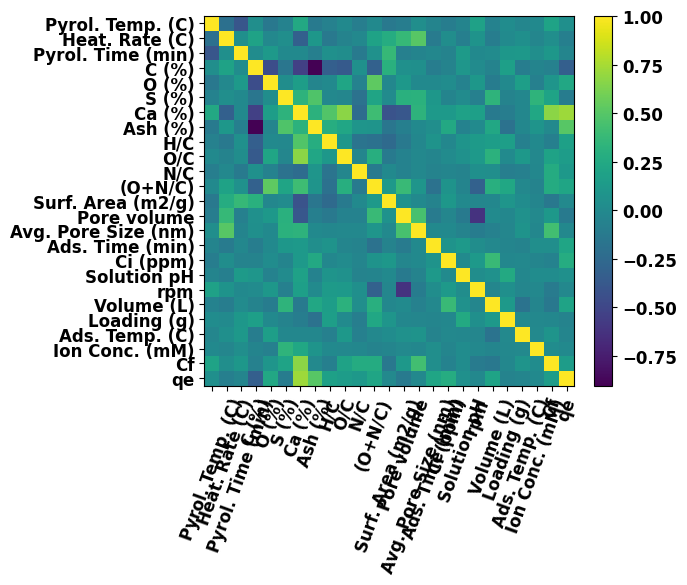

In [11]:
from easy_mpl import imshow
imshow(corr, colorbar=True)

In [12]:
df = df.fillna(0.0)

In [13]:

node_angles = circular_layout(corr.columns.tolist(), corr.columns.tolist(), start_pos=90,
                              group_boundaries=[0, len(corr.columns.tolist()) // 2]
                              )

In [14]:
node_angles.shape

(25,)

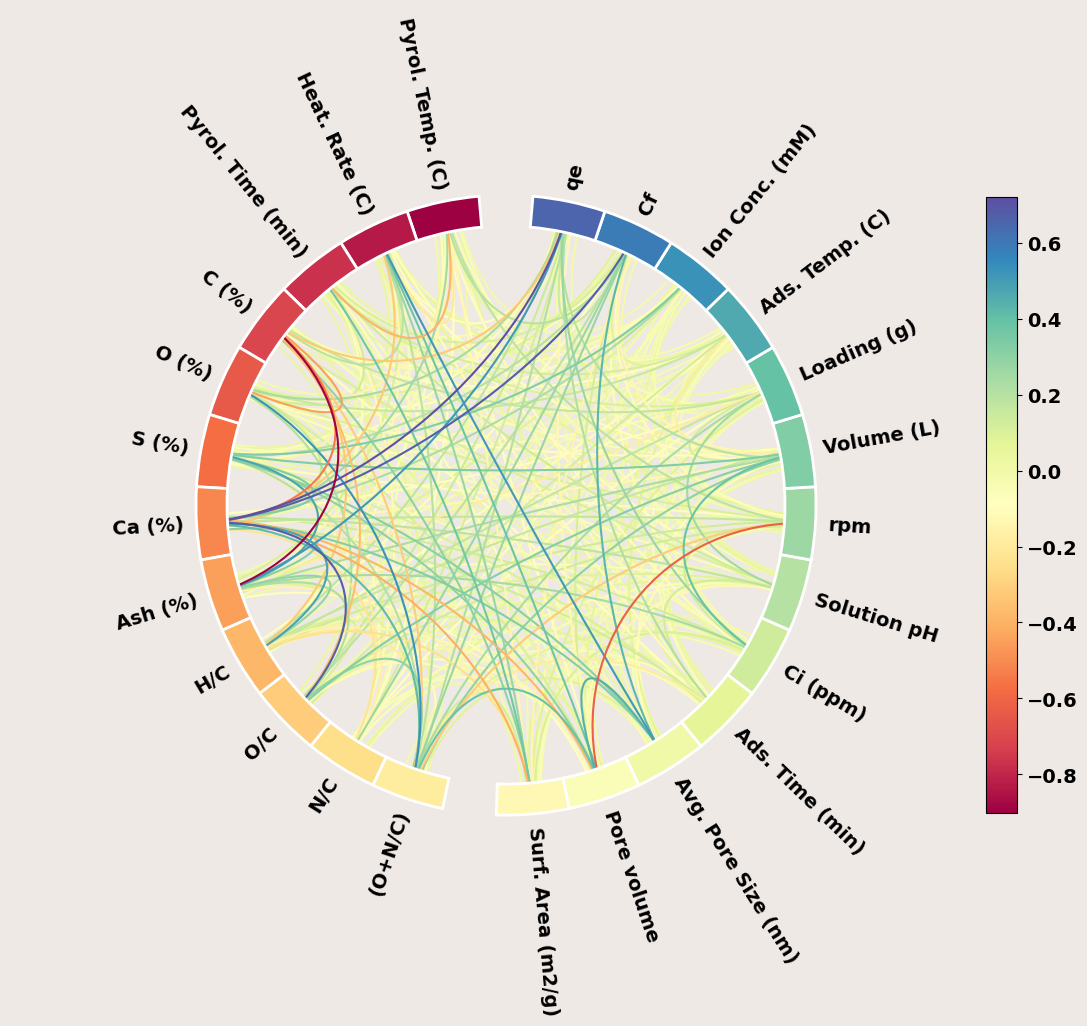

In [15]:
fig, ax = plt.subplots(figsize=(16, 16),
                       facecolor="#EFE9E6",
                       subplot_kw=dict(polar=True))
fig, axes = plot_connectivity_circle(
    corr.values,
    node_names = corr.columns.tolist(),
    node_angles=node_angles,
    fontsize_names =14,
    fontsize_colorbar =14,
    facecolor ="#EFE9E6",
    textcolor='black',
    #n_lines = 14,
    node_edgecolor="white",
    colormap="Spectral",
    colorbar_size=0.5,
    colorbar_pos=(-0.5, 0.5),
    ax=ax)

fig.savefig("chord_large", dpi=600, bbox_inches="tight")
fig.tight_layout()


In [16]:
df, *_ = make_data()
print(df.shape)
df = df.drop(columns=['Adsorbent', 'Feedstock', 'ion_type'])
print(df.shape)
df = df.rename(columns=LABEL_MAP)
corr = df.corr(method="pearson")
print(corr.shape)

(2959, 18)
(2959, 15)
(15, 15)


In [17]:
node_angles = circular_layout(corr.columns.tolist(), corr.columns.tolist(), start_pos=90,
                              group_boundaries=[0, len(corr.columns.tolist()) // 2]
                              )

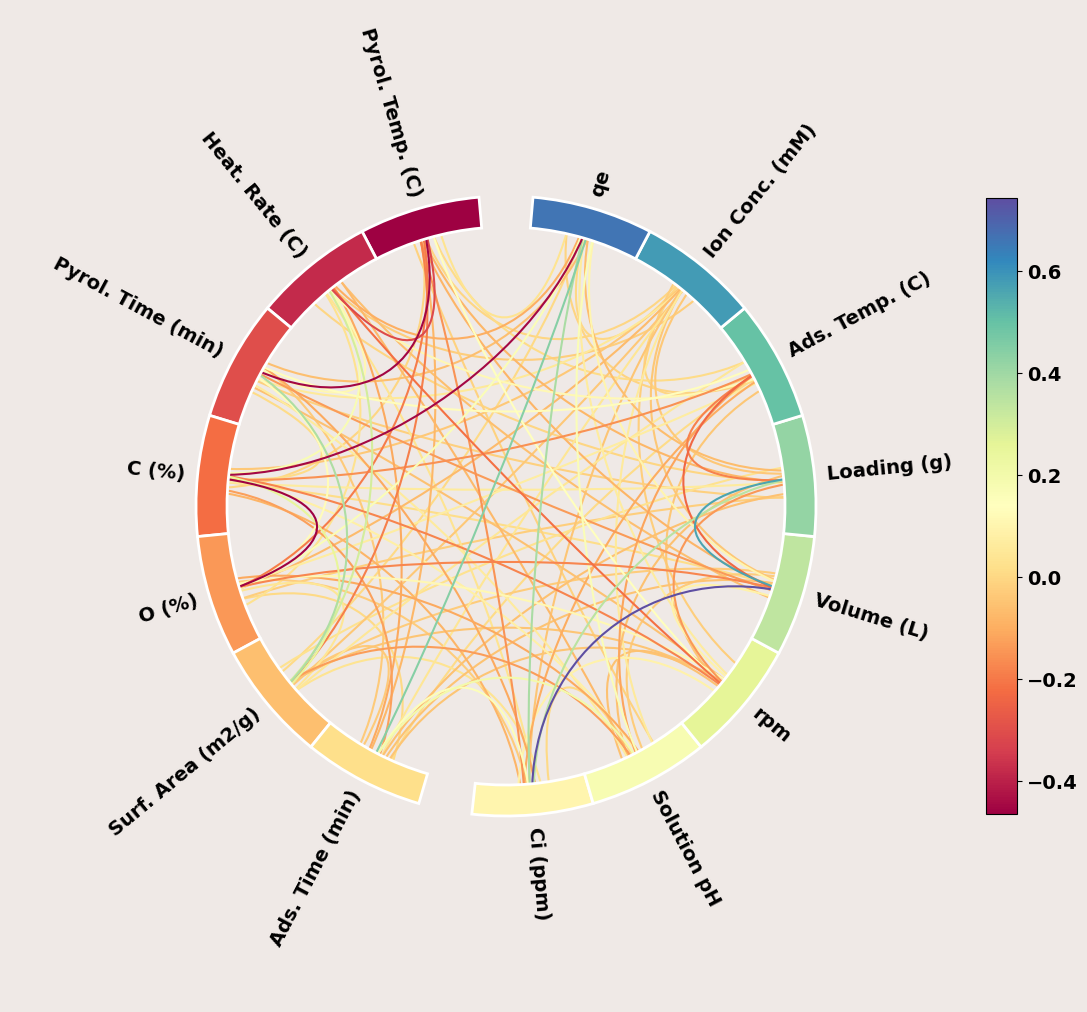

In [18]:
fig, ax = plt.subplots(figsize=(16, 16),
                       facecolor="#EFE9E6",
                       subplot_kw=dict(polar=True))
fig, axes = plot_connectivity_circle(
    corr.values,
    node_names = corr.columns.tolist(),
    node_angles=node_angles,
    fontsize_names =14,
    fontsize_colorbar =14,
    facecolor ="#EFE9E6",
    textcolor='black',
    #n_lines = 14,
    node_edgecolor="white",
    colormap="Spectral",
    colorbar_size=0.5,
    colorbar_pos=(-0.5, 0.5),
    ax=ax)

fig.savefig("chord_small", dpi=600, bbox_inches="tight")
fig.tight_layout()